In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from math import pi

espessura_cp1 = 0.420 #cm 
espessura_cp2 = 0.420 #cm 
largura_cp1   = 1.28  #cm 1.27
largura_cp2   = 1.28  #cm 

line_limite1 = 237 #strain
line_limite2 = 238

In [3]:
def calcula_area_secao_transversal(espessura, largura):    
    return espessura * largura

def calcula_tensao(forca, area_sec_transv):
    return forca/area_sec_transv

In [4]:
df_corpo_prova_1 = pd.read_csv("POL_Tracao_GLR_1.csv",decimal=",",delimiter=";")[:-1]
df_corpo_prova_2 = pd.read_csv("POL_Tracao_GLR_2.csv",decimal=",",delimiter=";")[:-1] 

In [5]:
l0_barra = 50
#cp1 
area_stv_1 = calcula_area_secao_transversal(espessura_cp2, largura_cp2)
tensao1    = calcula_tensao(df_corpo_prova_1["Force (N)"], area_stv_1)
df_corpo_prova_1["Tensão"] = tensao1*1e4 #Pascal

#cp2 
area_stv_2 = calcula_area_secao_transversal(espessura_cp2, largura_cp2)
tensao2    = calcula_tensao(df_corpo_prova_2["Force (N)"], area_stv_1) 
df_corpo_prova_2["Tensão"] = tensao2*1e4

## Grafico extensometro 0.8%


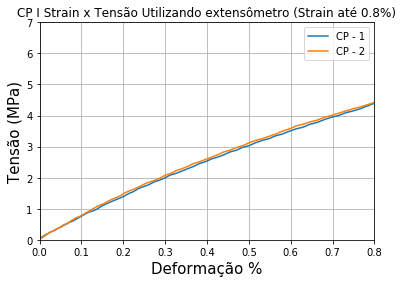

In [6]:
plt.plot(df_corpo_prova_1['Strain (%)'][:line_limite1],df_corpo_prova_1['Tensão'][:line_limite1]/1e6, label="CP - 1")
plt.plot(df_corpo_prova_2['Strain (%)'][:line_limite2],df_corpo_prova_2['Tensão'][:line_limite2]/1e6, label="CP - 2")
plt.legend()
plt.ylim(0, 7)
plt.xlim(0,.8)
plt.xlabel("Deformação %", fontsize = 15)
plt.ylabel("Tensão (MPa)", fontsize = 15)
plt.title("CP I Strain x Tensão Utilizando extensômetro (Strain até 0.8%)")
plt.grid(True)
plt.show()

CP I Strain x Tensão Utilizando extensômetro (Strain até 0.8%)


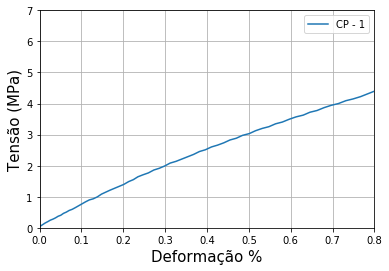

In [7]:
plt.plot(df_corpo_prova_1['Strain (%)'][:line_limite1],df_corpo_prova_1['Tensão'][:line_limite1]/1e6, label="CP - 1")
plt.legend()
plt.ylim(0,7)
plt.xlim(0,.8)
plt.xlabel("Deformação %", fontsize = 15)
plt.ylabel("Tensão (MPa)", fontsize = 15)
print("CP I Strain x Tensão Utilizando extensômetro (Strain até 0.8%)")
plt.grid(True)
plt.show()

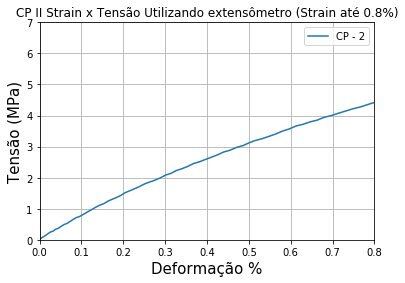

In [71]:
plt.plot(df_corpo_prova_2['Strain (%)'][:line_limite2],df_corpo_prova_2['Tensão'][:line_limite2]/1e6, label="CP - 2")
plt.legend()
plt.xlim(0,.8)
plt.ylim(0,7)
# plt.ylim(0,3000)
plt.xlabel("Deformação %", fontsize = 15)
plt.ylabel("Tensão (MPa)", fontsize = 15)
plt.title("CP II Strain x Tensão Utilizando extensômetro (Strain até 0.8%)")
plt.grid(True)
plt.show()

## Gráfico ensaio completo arrumar aqui

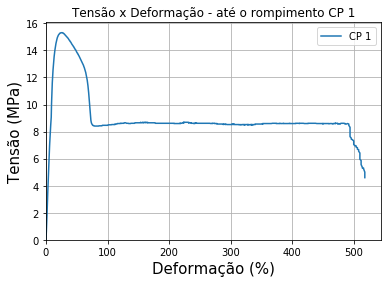

In [69]:
plt.plot(df_corpo_prova_1['Position (mm)']/l0_barra*100,df_corpo_prova_1['Tensão']/1e6, label="CP 1")
plt.legend()
plt.xlabel("Deformação (%)", fontsize=15)
plt.ylabel("Tensão (MPa)", fontsize=15)
plt.xlim(0,)
plt.ylim(0,)
plt.grid(True)

# plt.xlim(0,16)
# plt.ylim(0,350)
plt.title("Tensão x Deformação - até o rompimento CP 1")
plt.show()

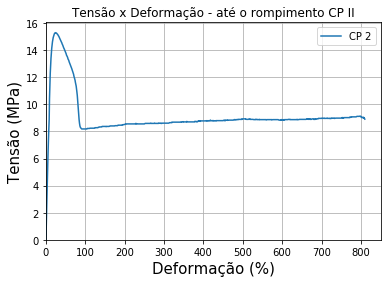

In [70]:
plt.plot(df_corpo_prova_2['Position (mm)']/l0_barra*100,df_corpo_prova_2['Tensão']/1e6, label="CP 2")
plt.legend()
plt.xlabel("Deformação (%)", fontsize=15)
plt.ylabel("Tensão (MPa)", fontsize=15)
plt.xlim(0,)
plt.ylim(0,)
plt.title("Tensão x Deformação - até o rompimento CP II")
plt.grid(True)
plt.show()

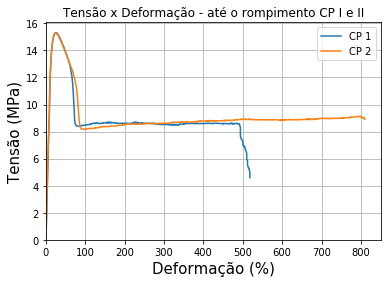

In [11]:
plt.plot(df_corpo_prova_1['Position (mm)']/l0_barra*100,df_corpo_prova_1['Tensão']/1e6, label="CP 1")
plt.plot(df_corpo_prova_2['Position (mm)']/l0_barra*100,df_corpo_prova_2['Tensão']/1e6, label="CP 2")
plt.legend()
plt.xlabel("Deformação (%)", fontsize=15)
plt.ylabel("Tensão (MPa)", fontsize=15)
plt.xlim(0,)
plt.ylim(0,)
plt.title("Tensão x Deformação - até o rompimento CP I e II")
plt.grid(True)
plt.show()

In [12]:
tmax1 = df_corpo_prova_1['Tensão'].max()*1e-6
tmax2 = df_corpo_prova_2['Tensão'].max()*1e-6
print(tmax1, tmax2)

15.308779761904763 15.290178571428573


## Módulo de Young

In [57]:
#coef angular da reta m = y-y0/x-x0
#reta 1 
x1 = 0.0134
x2 = 0.0780
y1 = df_corpo_prova_1['Tensão'][df_corpo_prova_1['Strain (%)'] == x1].values[0]
y2 = df_corpo_prova_1['Tensão'][df_corpo_prova_1['Strain (%)'] == x2].values[0]
#Y esta em Newton/cm²
coef1 = ((y2-y1)/(x2-x1)) # convertendo para PA

In [58]:
print(f'Modulo de Young CP 1: {coef1*1e-7:.2f} GPa')

Modulo de Young CP 1: 0.68 GPa


In [59]:
#coef angular da reta m = y-y0/x-x0
#reta 2
xx1 = 0.0124 # Definir
xx2 = 0.0798
y1 = df_corpo_prova_2['Tensão'][df_corpo_prova_2['Strain (%)'] == xx1].values[0]
y2 = df_corpo_prova_2['Tensão'][df_corpo_prova_2['Strain (%)'] == xx2].values[0]
#Y esta em Newton/cm²
coef2 = ((y2-y1)/(xx2-xx1)) # convertendo para PA

In [60]:
print(f'Modulo de Young CP 2: {coef2*1e-7:.2f} GPa')

Modulo de Young CP 2: 0.78 GPa


## Limite de escoamento

In [17]:
#Mas olhando o nosso gráfico aqui, o de escoamento é o valor máximo atingido, e o tensão é a tensão no momento do rompimento

In [18]:
esco1 = max(df_corpo_prova_1['Tensão'])
print("Limite de escoamento CP 1: {:.2f} MPa".format(esco1/1000000))

Limite de escoamento CP 1: 15.31 MPa


In [19]:
esco2 = max(df_corpo_prova_2['Tensão'])
print("Limite de escoamento CP 2: {:.2f} MPa".format(esco2/1000000))

Limite de escoamento CP 2: 15.29 MPa


## Limite de tensão

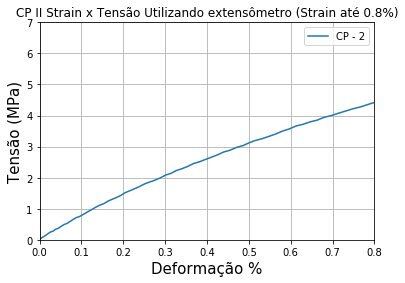

In [86]:
plt.plot(df_corpo_prova_2['Strain (%)'][:line_limite2],df_corpo_prova_2['Tensão'][:line_limite2]/1e6, label="CP - 2")
plt.legend()
plt.xlim(0,.8)
plt.ylim(0,7)
# plt.ylim(0,3000)
plt.xlabel("Deformação %", fontsize = 15)
plt.ylabel("Tensão (MPa)", fontsize = 15)
plt.title("CP II Strain x Tensão Utilizando extensômetro (Strain até 0.8%)")
plt.grid(True)
plt.show()